## Tugas Akhir FGA Big Data 2024
- Nama Lengkap : M. Hilma Minanur Rohman
- Nomor Pendaftaran : 19584291110-21

In [20]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [21]:
%cd /content/drive/My Drive/fga_stunting/

/content/drive/My Drive/fga_stunting


In [22]:
import pandas as pd

In [23]:
pd.set_option('display.max_columns', None)

In [24]:
dataset = pd.read_csv('data_balita.csv')

In [25]:
dataset.head(5)

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,0,laki-laki,44.591973,stunted
1,0,laki-laki,56.705203,tinggi
2,0,laki-laki,46.863358,normal
3,0,laki-laki,47.508026,normal
4,0,laki-laki,42.743494,severely stunted


In [26]:
dataset.dtypes

,0
Umur (bulan),int64
Jenis Kelamin,object
Tinggi Badan (cm),float64
Status Gizi,object


In [27]:
import missingno as msno
import matplotlib.pyplot as plt

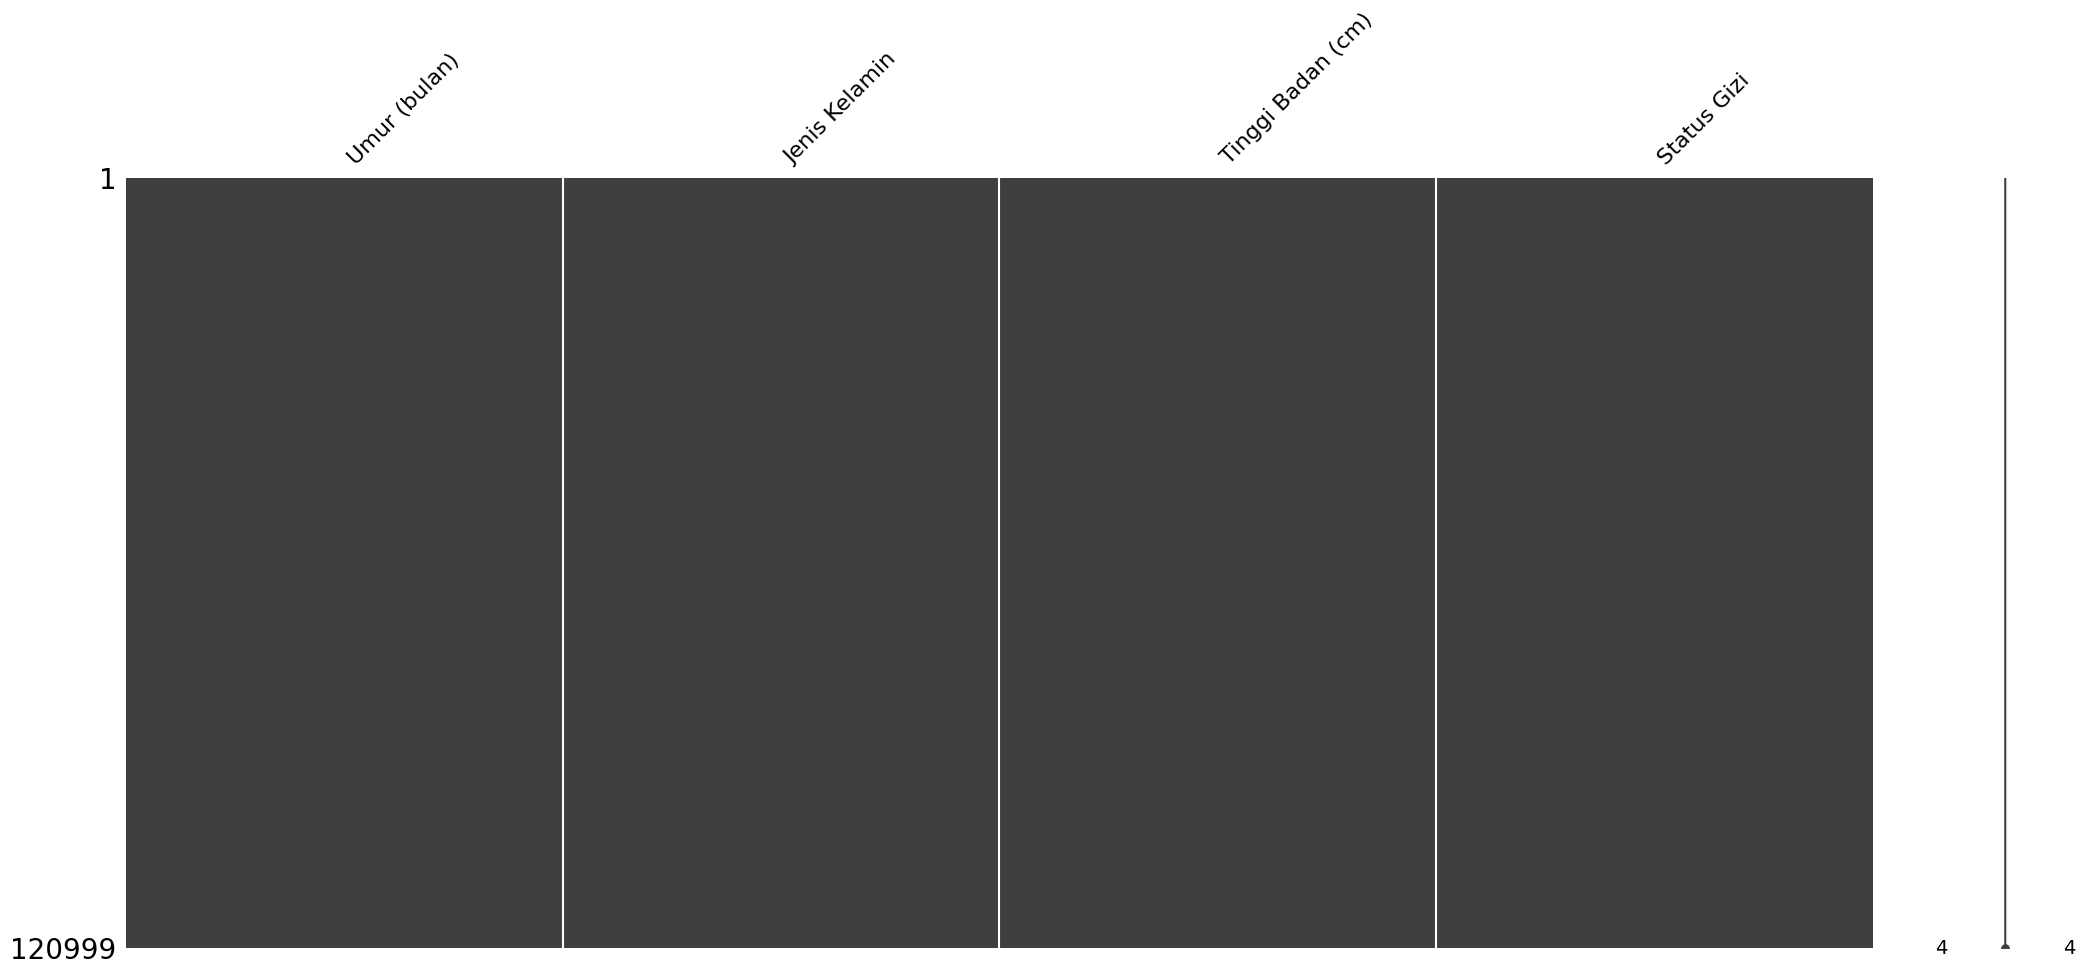

In [28]:
msno.matrix(dataset)
plt.show()

In [29]:
dataset["Jenis Kelamin"].unique()

array(['laki-laki', 'perempuan'], dtype=object)

In [30]:
dataset["Status Gizi"].unique()

array(['stunted', 'tinggi', 'normal', 'severely stunted'], dtype=object)

In [31]:
mapping = {
    'perempuan': 0,
    'laki-laki': 1,
    }
dataset['Jenis Kelamin'] = dataset['Jenis Kelamin'].map(mapping)

In [32]:
mapping = {
    'normal': 0,
    'tinggi': 1,
    'stunted': 2,
    'severely stunted': 3,
    }
dataset['Status Gizi'] = dataset['Status Gizi'].map(mapping)

In [33]:
import seaborn as sns

<Axes: >

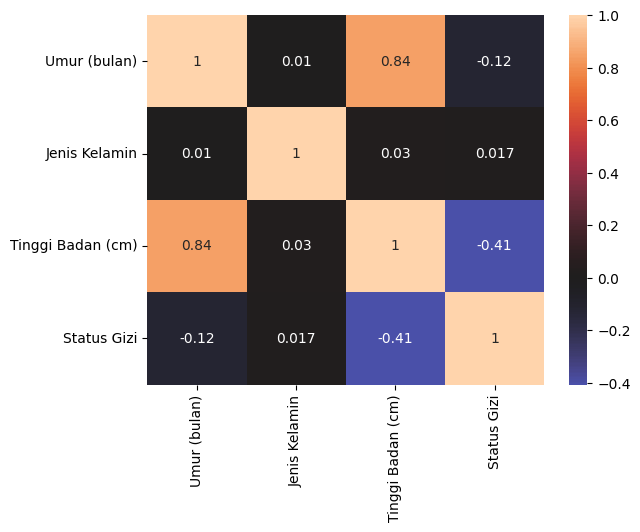

In [34]:
#correlation matrix
corrmat= dataset.corr()
sns.heatmap(corrmat,annot=True, center=0)

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dataset)
scaled_ds = pd.DataFrame(scaler.transform(dataset),columns= dataset.columns )
print("All features are now scaled")

All features are now scaled


In [36]:
scaled_ds.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi
0,-1.716855,1.008341,-2.546885,0.973584
1,-1.716855,1.008341,-1.846735,0.102269
2,-1.716855,1.008341,-2.415598,-0.769046
3,-1.716855,1.008341,-2.378336,-0.769046
4,-1.716855,1.008341,-2.653727,1.844899


In [37]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

Elbow Method to determine the number of clusters to be formed:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

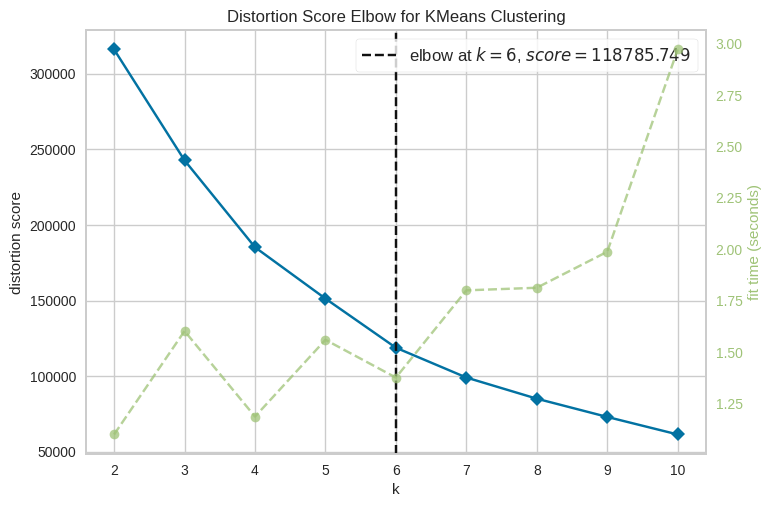

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering
kmeans = KMeans(n_clusters=6, random_state=42)
# fit model and predict clusters
yhat_AC = kmeans.fit_predict(scaled_ds)
scaled_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
dataset["Clusters"]= yhat_AC

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
dataset.head()

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm),Status Gizi,Clusters
0,0,1,44.591973,2,4
1,0,1,56.705203,1,2
2,0,1,46.863358,0,2
3,0,1,47.508026,0,2
4,0,1,42.743494,3,4


### cek visualisasi agglomerative clustering

## Evaluasi Model

### hasil distribusi clustering

<ipython-input-41-18d601be0e08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl = sns.countplot(x=dataset["Clusters"], palette= pal)


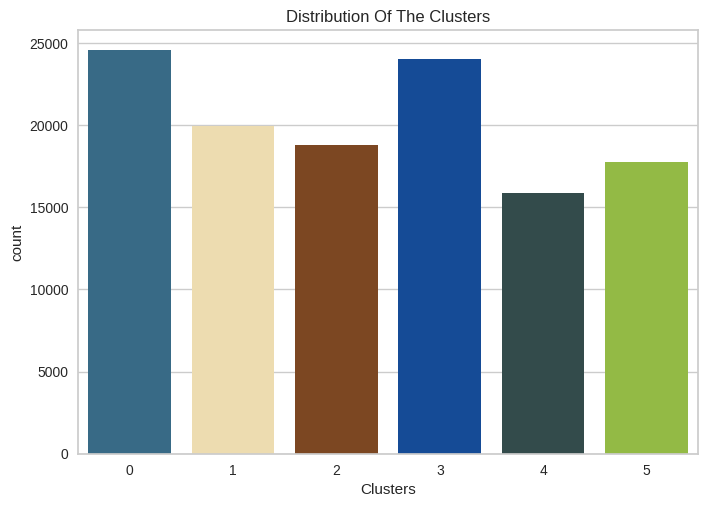

In [41]:
pal = ["#2B6E93", "#F7E1A6", "#8B4513", "#0047AB", "#2F4F4F", "#9ACD32"]
pl = sns.countplot(x=dataset["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

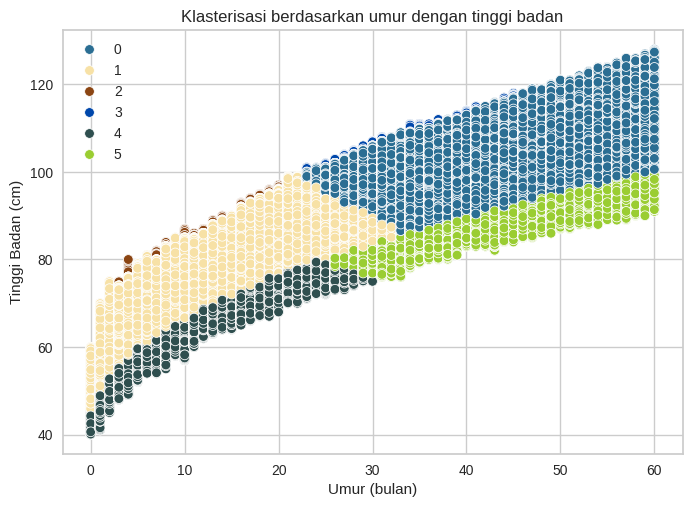

In [42]:
pl = sns.scatterplot(data = dataset,x=dataset["Umur (bulan)"], y=dataset["Tinggi Badan (cm)"],hue=dataset["Clusters"], palette= pal)
pl.set_title("Klasterisasi berdasarkan umur dengan tinggi badan")
plt.legend()
plt.show()

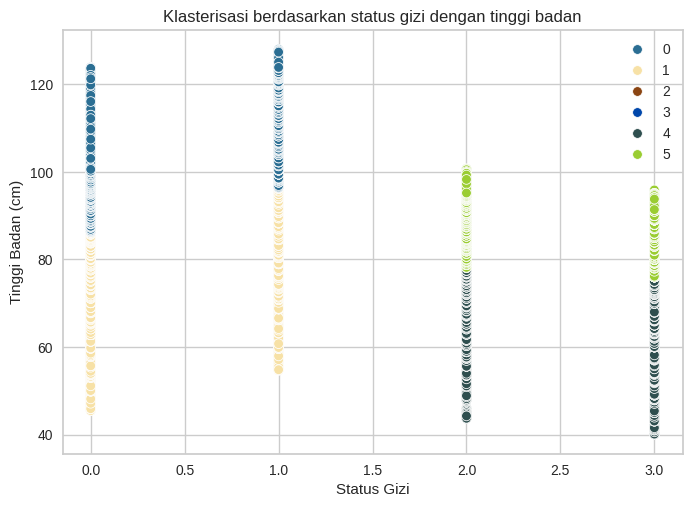

In [47]:
pl = sns.scatterplot(data = dataset,x=dataset["Status Gizi"], y=dataset["Tinggi Badan (cm)"],hue=dataset["Clusters"], palette= pal)
pl.set_title("Klasterisasi berdasarkan status gizi dengan tinggi badan")
plt.legend()
plt.show()

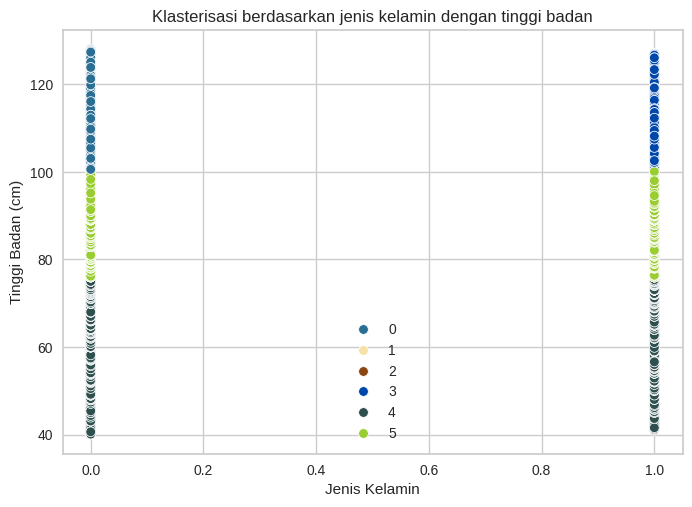

In [44]:
pl = sns.scatterplot(data = dataset,x=dataset["Jenis Kelamin"], y=dataset["Tinggi Badan (cm)"],hue=dataset["Clusters"], palette= pal)
pl.set_title("Klasterisasi berdasarkan jenis kelamin dengan tinggi badan")
plt.legend()
plt.show()

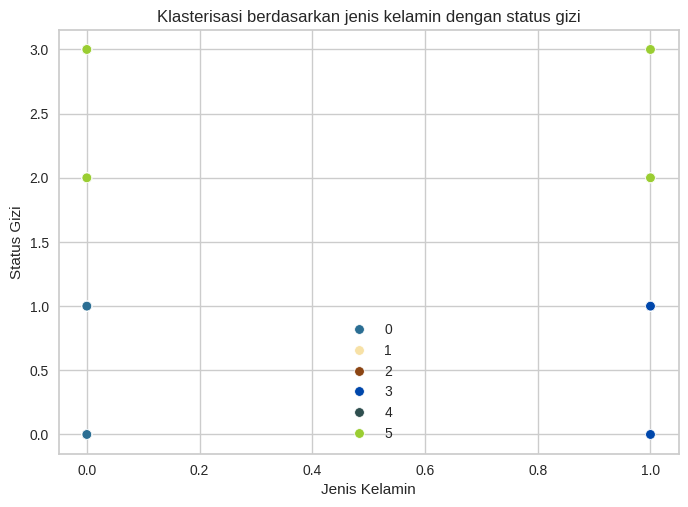

In [45]:
pl = sns.scatterplot(data = dataset,x=dataset["Jenis Kelamin"], y=dataset["Status Gizi"],hue=dataset["Clusters"], palette= pal)
pl.set_title("Klasterisasi berdasarkan jenis kelamin dengan status gizi")
plt.legend()
plt.show()

## Cluster 0
Bayi berumur 30 sampai 60 bulan dengan tinggi 110 sampa 130 cm
Memiliki status gizi normal dan tinggi
Cenderung perempuan
## Cluster 1
Bayi berumur 0 sampai 32 bulan dengan tinggi 45 sampai 100 cm
Memiliki status gizi normal dan tinggi
## Cluster 2
Bayi berumur 5 sampai 20 bulan dengan tinggi 75 sampai 100 cm
Memiliki status stunted dan severely stunted
## Cluster 3
Bayi berumur 25 sampai 60 bulan dengan tinggi 85 sampai 130 cm
Memiliki status gizi normal dan tinggi
Cenderung laki-laki
## Cluster 4
Bayi berumur 30 sampai 60 bulan dengan tinggi 40 sampai 80 cm
Memiliki status stunted dan severely stunted
## Cluster 5
Bayi berumur 25 sampai 60 bulan dengan tinggi 75 sampai 100 cm
Memiliki status stunted dan severely stunted